In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('/content/NSSO68.csv')
data.head()

<ipython-input-30-07210120653b>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/NSSO68.csv')


,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [31]:
data.shape

(101662, 384)

In [32]:
# Filter for Gujarat state data
df = data[data['state_1'] == 'GUJ']

In [33]:
# Display dataset info
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
   slno                                 grp  Round_Centre  FSU_number  Round  \
0     1  40999999999999992652495293775872.0             1       41000     68   
1     2  40999999999999992652495293775872.0             1       41000     68   
2     3  40999999999999992652495293775872.0             1       41000     68   
3     4  40999999999999992652495293775872.0             1       41000     68   
4     5  40999999999999992652495293775872.0             1       41000     68   

   Schedule_Number  Sample  Sector  state  State_Region  ...  pickle_v  \
0               10       1       2     24           242  ...       0.0   
1     

In [34]:
# Finding missing values
missing_info = df.isna().sum()
print("Missing Values Information:")
print(missing_info)

Missing Values Information:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [35]:
# Subsetting the data
gujnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Impute missing values with mean for specific columns
gujnew['Meals_At_Home'].fillna(gujnew['Meals_At_Home'].mean(), inplace=True)

<ipython-input-35-cce874279333>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gujnew['Meals_At_Home'].fillna(gujnew['Meals_At_Home'].mean(), inplace=True)


In [36]:
# Function to remove outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    return df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]

In [37]:
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    gujnew = remove_outliers(gujnew, col)

In [38]:
# Summarize consumption
gujnew['total_consumption'] = gujnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Summarize and display top consuming districts and regions
district_summary = gujnew.groupby('District')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
region_summary = gujnew.groupby('Region')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)

print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

Top Consuming Districts:
    District  total_consumption
6          7        1678.826061
8          9        1161.756429
21        22        1021.337224
11        12         760.987718
Region Consumption Summary:
   Region  total_consumption
4       5        4173.024440
1       2        3236.153319
0       1        2602.955547
2       3         742.985993
3       4         339.647619


In [39]:
# Rename districts and sectors
district_mapping = {
    "1": "Kachchh", "2": "Banas Kantha", "3": "Patan", "4": "Mahesana", "5": "Sabar Kantha", "6": "Gandhinagar",
    "7": "Ahmadabad", "8": "Surendranagar", "9": "Rajkot", "10": "Jamnagar", "11": "Porbandar", "12": "Junagadh",
    "13": "Amreli", "14": "Bhavnagar", "15": "Anand", "16": "Kheda", "17": "Panch Mahals", "18": "Dohad",
    "19": "Vadodara", "20": "Narmada", "21": "Bharuch", "22": "Surat", "23": "The Dangs", "24": "Navsari", "25": "Valsad"
}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

gujnew['District'] = gujnew['District'].astype(str).replace(district_mapping)
gujnew['Sector'] = gujnew['Sector'].astype(str).replace(sector_mapping)


#HISTOGRAM

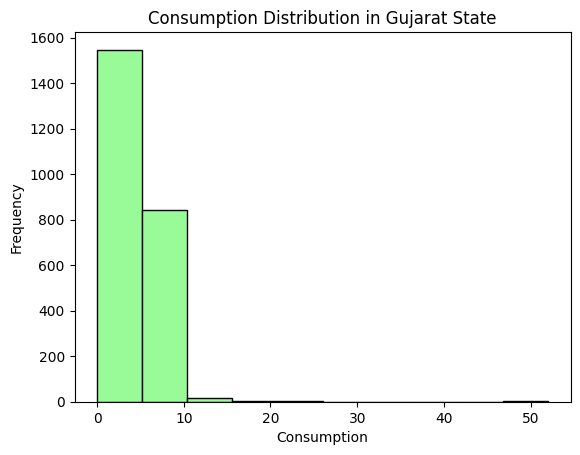

In [43]:
# Histogram of total consumption
plt.hist(gujnew['total_consumption'], bins=10, color='palegreen', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Gujarat State')
plt.show()

#BAR PLOT

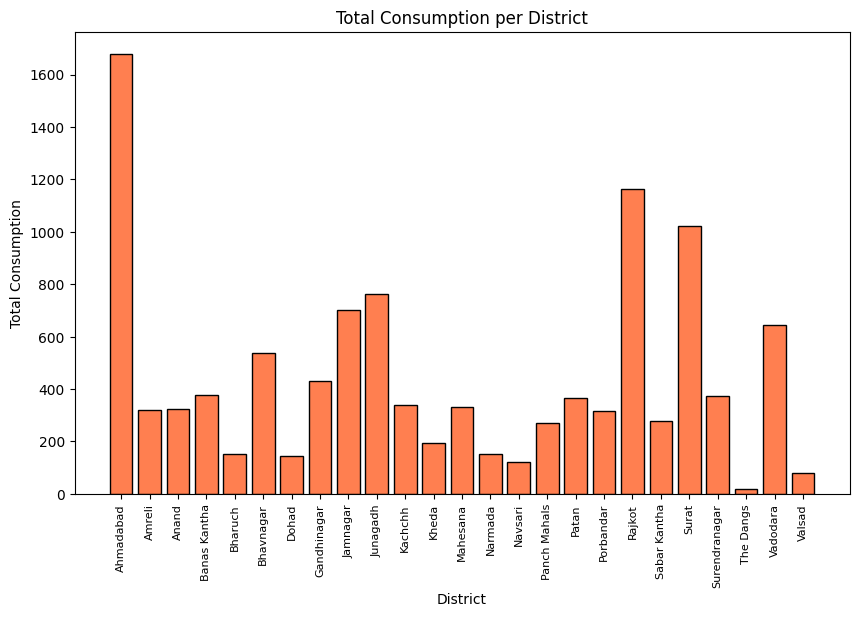

In [42]:
# Bar plot of total consumption per district
GUJ_consumption = gujnew.groupby('District')['total_consumption'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(GUJ_consumption['District'], GUJ_consumption['total_consumption'], color='coral', edgecolor='black')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('District')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per District')
plt.show()

#GEO MAP

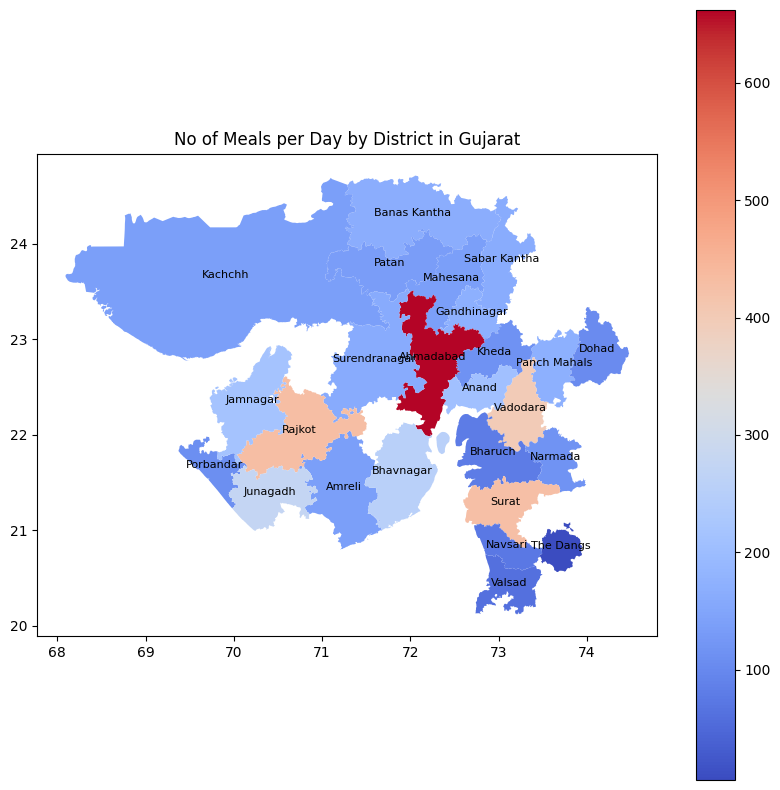

In [44]:
# Plot 'No of Meals per day' on the Gujarat state map
# Read the Gujarat GeoJSON file
data_map = gpd.read_file("/content/GUJARAT_DISTRICTS.geojson")
data_map = data_map.rename(columns={'dtname': 'District'})

# Merge the GeoJSON data with the summarized consumption data
GUJ_consumption2 = gujnew.groupby('District')['No_of_Meals_per_day'].sum().reset_index()
data_map_data = data_map.merge(GUJ_consumption2, on='District')

# Plot the 'No_of_Meals_per_day' variable on the Gujarat map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data_map_data.plot(column='No_of_Meals_per_day', ax=ax, legend=True, cmap='coolwarm')
data_map_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
plt.title('No of Meals per Day by District in Gujarat')
plt.show()